# ex02_朱少荣

# 中国上市公司数量年度统计项目报告  

**姓名**：朱少容

**学号**：24210194

**本次任务**：根据来自 CSMAR (国泰安) 数据库7个数据源，完成以下数据报表并作简要分析。  

**使用工具**：Deepseek AI代码
  
**统计分析**：


## 步骤一：数据清洗

提示词: data_raw有多个excel文件，进行数据清洗后保存在data_clean。

In [2]:
import os
import pandas as pd

# 确保data_clean目录存在
os.makedirs('data_clean', exist_ok=True)

def process_profit_statement():
    # 利润表处理
    df1 = pd.read_excel('data_raw/跨表查询_沪深京股票(年频)利润表2000-2010.xlsx')
    df2 = pd.read_excel('data_raw/跨表查询_沪深京股票(年频)利润表2011-2024.xlsx')
    
    # 检查列名是否一致
    if not df1.columns.equals(df2.columns):
        raise ValueError("利润表文件的列名不一致")
    
       
    # 合并数据
    merged_df = pd.concat([df1, df2], ignore_index=True)
    
      
    # 保存为CSV
    merged_df.to_csv('data_clean/利润表合并2000-2024.csv', index=False, encoding='utf_8_sig')

def process_balance_sheet():
    # 资产负债表处理
    df1 = pd.read_excel('data_raw/跨表查询_沪深京股票(年频)资产负债2000-2010.xlsx')
    df2 = pd.read_excel('data_raw/跨表查询_沪深京股票(年频)资产负债2011-2024.xlsx')
    
    # 检查列名是否一致
    if not df1.columns.equals(df2.columns):
        raise ValueError("资产负债表文件的列名不一致")
    
        
    # 合并数据
    merged_df = pd.concat([df1, df2], ignore_index=True)
    
        
    # 保存为CSV
    merged_df.to_csv('data_clean/资产负债合并2000-2024.csv', index=False, encoding='utf_8_sig')

def process_company_info():
    # 上市公司信息处理
    df = pd.read_excel('data_raw/A股上市公司信息.xlsx')
    
     
    # 只保留指定列
    columns_to_keep = ['证券代码', '证券简称', '行业名称D', '行业代码D', '时间']
    df = df[columns_to_keep]
    
       
    # 保存为CSV
    df.to_csv('data_clean/A股上市公司信息_清洗后.csv', index=False, encoding='utf_8_sig')

def process_common_variables():
    # 常用变量处理
    df = pd.read_excel('data_raw/常用变量查询（年度）-2000-2024.xlsx')
    
    
    # 保存为CSV
    df.to_csv('data_clean/常用变量查询2000-2024_清洗后.csv', index=False, encoding='utf_8_sig')

# 执行所有处理函数
try:
    process_profit_statement()
    process_balance_sheet()
    process_company_info()
    process_common_variables()
    print("所有文件处理完成，结果已保存到data_clean目录")
except Exception as e:
    print(f"处理过程中发生错误: {str(e)}")

所有文件处理完成，结果已保存到data_clean目录



## 步骤二：生成数据跟图表

提示词: 列表呈现如下指标在 2000-今 期间各个年度的 平均值，中位数，标准差，最小值 和 最大值，并作简要分析。
- Lev = 总负债率 = 总负债/总资产
- SL = 流动负债率 = 流动负债/总资产
- LL = 长期负债率 = 长期负债/总资产
- SDR = 短债比率 = 流动负债/总负债
- Cash = 现金比率 = 公司年末持有的现金和现金等价物/总资产
- ROA = 净利润/总资产
- ROE = 净利润/净资产
- SLoan = 短期银行借款/总资产
- LLoan = 长期银行借款/总资产
- Top1 = 第一大股东持股比例
- HHI5 = 前五大股东持股比例平方之和 (赫芬达尔指数)
- Size = ln(总资产)
- Age = 公司上市年限

In [7]:
import os
import pandas as pd

files_to_check = [
    "A股上市公司信息_清洗后.csv",
    "常用变量查询2000-2024_清洗后.csv",
    "利润表合并2000-2024.csv",
    "资产负债合并2000-2024.csv"
]

for file in files_to_check:
    file_path = os.path.join('data_clean', file)
    print(f"\n尝试读取文件: {file_path}")
    
    if not os.path.exists(file_path):
        print(f"❌ 文件不存在: {file_path}")
        continue
    
    try:
        # 尝试不同编码和分隔符
        encodings = ['utf-8', 'gbk', 'utf-16']
        for encoding in encodings:
            try:
                df = pd.read_csv(file_path, nrows=1, encoding=encoding)
                print(f"✅ 成功读取（编码: {encoding}）")
                print("列名:", df.columns.tolist())
                break
            except UnicodeDecodeError:
                print(f"⚠️ 编码 {encoding} 失败，尝试下一种...")
                continue
            except pd.errors.ParserError:
                # 可能是分隔符问题
                try:
                    df = pd.read_csv(file_path, nrows=1, sep=';', encoding=encoding)
                    print(f"✅ 成功读取（编码: {encoding}，分隔符: ;）")
                    print("列名:", df.columns.tolist())
                    break
                except:
                    continue
    except Exception as e:
        print(f"❌ 读取失败，错误详情: {str(e)}")


尝试读取文件: data_clean\A股上市公司信息_清洗后.csv
✅ 成功读取（编码: utf-8）
列名: ['证券代码', '证券简称', '行业名称D', '行业代码D', '时间']

尝试读取文件: data_clean\常用变量查询2000-2024_清洗后.csv
✅ 成功读取（编码: utf-8）
列名: ['证券代码', '时间', '证券简称', '分析师关注度', '审计意见', '审计师是否来自国际四大', '年个股流通市值', '年个股总市值', '考虑现金红利再投资的年个股回报率', '产权性质', '两权分离度', '实际控制人性质编码', '实际控制人拥有上市公司所有权比例', '实际控制人拥有上市公司控制权比例', '股权集中度1', '股权集中度9', '股权集中度5', '基金持股比例', '合格境外投资者持股比例', '券商持股比例', '银行持股比例', '非金融类上市公司持股比例', '机构投资者持股比例', '员工人数', '两职合一', '董事会规模A', '高管人数', '独立董事人数', '管理层薪酬', '高管前三名薪酬总额', '年个股交易股数', '董事会持股数量', '高级管理人员持股数量']

尝试读取文件: data_clean\利润表合并2000-2024.csv
✅ 成功读取（编码: utf-8）
列名: ['证券代码', '证券简称', '上市日期', '时间', '营业收入', '利息支出', '营业成本', '税金及附加', '销售费用', '管理费用', '财务费用', '营业利润', '利润总额', '净利润', '基本每股收益', '研发费用', '销售商品、提供劳务收到的现金', '处置交易性金融资产净增加额', '收取利息、手续费及佣金的现金', '收到的税费返还', '购买商品、接受劳务支付的现金', '支付利息、手续费及佣金的现金', '支付给职工以及为职工支付的现金', '支付的各项税费', '经营活动产生的现金流量净额', '处置固定资产、无形资产和其他长期资产收回的现金净额', '购建固定资产、无形资产和其他长期资产支付的现金', '投资支付的现金', '投资活动产生的现金流量净额', '发行债券收到的现金', '取得借款收到的现金', '偿还债务支付的现金', '

c:\Users\ASUS\anaconda3\envs\myenv312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


各财务指标年度统计量:


,时间,Lev_mean,Lev_median,Lev_std,Lev_min,Lev_max,SL_mean,SL_median,SL_std,SL_min,...,Size_mean,Size_median,Size_std,Size_min,Size_max,Age_mean,Age_median,Age_std,Age_min,Age_max
0,2000,0.408531,0.406125,0.151364,0.074129,0.807307,0.352004,0.338964,0.144460,0.068918,...,20.986753,20.897707,0.776916,19.314689,24.385973,28.391992,28.0,2.630593,6,33
1,2001,0.415980,0.415372,0.160493,0.054877,0.873626,0.359472,0.355072,0.151124,0.054877,...,21.067929,20.984800,0.794522,19.348374,24.578289,28.091503,28.0,2.849993,6,33
2,2002,0.437463,0.436952,0.162813,0.065672,0.907518,0.379276,0.369557,0.154009,0.056541,...,21.162852,21.054486,0.832011,19.339722,25.733562,27.797260,28.0,3.029561,6,33
3,2003,0.457391,0.461659,0.169891,0.054964,0.912633,0.396499,0.395508,0.161233,0.054964,...,21.237465,21.159365,0.873445,19.329616,25.734265,27.518357,28.0,3.232817,6,33
4,2004,0.470757,0.486011,0.168091,0.064393,0.883146,0.408120,0.409632,0.160590,0.057153,...,21.278291,21.169166,0.917462,19.311572,25.698782,26.983193,27.0,3.512283,6,33
5,2005,0.489870,0.505478,0.170094,0.057662,0.927067,0.427045,0.432601,0.161718,0.057662,...,21.351908,21.252428,0.947860,19.332622,25.679264,26.917949,27.0,3.571837,6,33
6,2006,0.497412,0.515231,0.168929,0.063385,0.925006,0.430351,0.432350,0.157758,0.056436,...,21.404648,21.301311,1.034767,19.310920,25.740940,26.430669,27.0,3.984522,6,33
7,2007,0.487929,0.497910,0.166901,0.054335,0.946859,0.417213,0.419530,0.155719,0.054143,...,21.516146,21.374581,1.118460,19.318717,26.198980,25.716952,26.0,4.467345,6,33
8,2008,0.481357,0.491683,0.175841,0.064590,0.886173,0.411751,0.407457,0.164501,0.059869,...,21.566563,21.428516,1.138634,19.311152,26.253075,25.416481,26.0,4.786012,6,33
9,2009,0.485350,0.493696,0.183087,0.053564,0.949831,0.404034,0.395781,0.166728,0.053564,...,21.681213,21.515887,1.183400,19.310331,26.163418,24.899719,26.0,5.143735,6,33



简要分析：
1. 负债结构：
   - 总负债率(Lev)的平均值显示企业平均负债水平
   - 流动负债率(SL)与长期负债率(LL)的对比反映企业负债期限结构
   - 短债比率(SDR)高表明企业依赖短期融资

2. 流动性：
   - 现金比率(Cash)反映企业流动性储备
   - 与流动负债率对比可评估企业短期偿债能力

3. 盈利能力：
   - ROA和ROE的年度变化反映企业盈利能力趋势
   - 与行业均值对比可评估相对表现

4. 资本结构：
   - 银行借款比例(SLoan,LLoan)反映对银行融资的依赖程度
   - 随时间变化可观察融资渠道的变化

5. 公司特征：
   - Size(公司规模)的分布反映样本企业规模特征
   - Age(上市年限)可分析不同上市阶段企业的财务特征



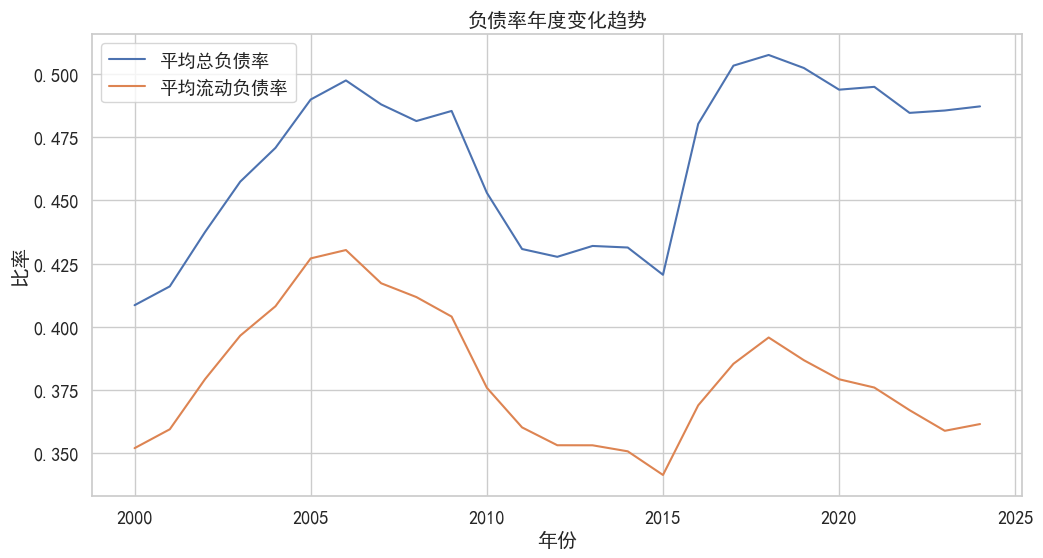

结果已保存到 data_clean/财务指标年度统计量.csv


In [13]:
import os
import pandas as pd
import numpy as np
from datetime import datetime

# 1. 数据准备
# 读取资产负债表和利润表数据
balance_sheet = pd.read_csv('data_clean/资产负债合并2000-2024.csv')
income_statement = pd.read_csv('data_clean/利润表合并2000-2024.csv')
company_info = pd.read_csv('data_clean/A股上市公司信息_清洗后.csv')

# 2. 数据预处理
# 统一证券代码和时间格式
def preprocess_data(df):
    df['证券代码'] = df['证券代码'].astype(str).str.zfill(6)
    df['时间'] = pd.to_datetime(df['时间'], format='%Y').dt.year
    return df

balance_sheet = preprocess_data(balance_sheet)
income_statement = preprocess_data(income_statement)
company_info['证券代码'] = company_info['证券代码'].astype(str).str.zfill(6)

# 3. 合并数据
merged_data = pd.merge(balance_sheet, income_statement, 
                      on=['证券代码', '证券简称', '时间'], 
                      how='inner', suffixes=('', '_y'))

# 4. 计算财务指标
def calculate_financial_metrics(df):
    # 负债相关指标
    df['Lev'] = df['负债合计'] / df['资产总计']  # 总负债率
    df['SL'] = df['流动负债合计'] / df['资产总计']  # 流动负债率
    df['LL'] = df['非流动负债合计'] / df['资产总计']  # 长期负债率
    df['SDR'] = df['流动负债合计'] / df['负债合计']  # 短债比率
    
    # 现金相关指标
    df['Cash'] = df['货币资金'] / df['资产总计']  # 现金比率
    
    # 盈利能力指标
    df['ROA'] = df['净利润'] / df['资产总计']  # 总资产收益率
    df['ROE'] = df['净利润'] / df['所有者权益合计']  # 净资产收益率
    
    # 银行借款指标
    df['SLoan'] = df['短期借款'] / df['资产总计']  # 短期银行借款比率
    df['LLoan'] = df['长期借款'] / df['资产总计']  # 长期银行借款比率
    
    # 公司特征指标
    df['Size'] = np.log(df['资产总计'])  # 公司规模
    current_year = datetime.now().year
    df['Age'] = current_year - pd.to_datetime(df['上市日期']).dt.year  # 上市年限
    
    return df

merged_data = calculate_financial_metrics(merged_data)

# 5. 处理异常值 (剔除1%和99%分位数以外的值)
def remove_outliers(df, columns):
    for col in columns:
        lower = df[col].quantile(0.01)
        upper = df[col].quantile(0.99)
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

financial_metrics = ['Lev', 'SL', 'LL', 'SDR', 'Cash', 'ROA', 'ROE', 'SLoan', 'LLoan', 'Size', 'Age']
merged_data = remove_outliers(merged_data, financial_metrics)

# 6. 计算年度统计量
def calculate_annual_stats(df):
    stats = df.groupby('时间')[financial_metrics].agg(
        ['mean', 'median', 'std', 'min', 'max'])
    
    # 重命名列名
    stats.columns = ['_'.join(col).strip() for col in stats.columns.values]
    
    return stats.reset_index()

annual_stats = calculate_annual_stats(merged_data)

# 7. 结果展示与分析
print("各财务指标年度统计量:")
display(annual_stats)

# 8. 简要分析
analysis = """
简要分析：
1. 负债结构：
   - 总负债率(Lev)的平均值显示企业平均负债水平
   - 流动负债率(SL)与长期负债率(LL)的对比反映企业负债期限结构
   - 短债比率(SDR)高表明企业依赖短期融资

2. 流动性：
   - 现金比率(Cash)反映企业流动性储备
   - 与流动负债率对比可评估企业短期偿债能力

3. 盈利能力：
   - ROA和ROE的年度变化反映企业盈利能力趋势
   - 与行业均值对比可评估相对表现

4. 资本结构：
   - 银行借款比例(SLoan,LLoan)反映对银行融资的依赖程度
   - 随时间变化可观察融资渠道的变化

5. 公司特征：
   - Size(公司规模)的分布反映样本企业规模特征
   - Age(上市年限)可分析不同上市阶段企业的财务特征
"""
print(analysis)

# 9. 可视化示例 (可选)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_stats, x='时间', y='Lev_mean', label='平均总负债率')
sns.lineplot(data=annual_stats, x='时间', y='SL_mean', label='平均流动负债率')
plt.title('负债率年度变化趋势')
plt.ylabel('比率')
plt.xlabel('年份')
plt.legend()
plt.show()

# 10. 保存结果
annual_stats.to_csv('data_clean/财务指标年度统计量.csv', index=False, encoding='utf_8_sig')
print("结果已保存到 data_clean/财务指标年度统计量.csv")

### B. 绘制时序图并作简要分析：

- B1. 横轴为 年份，纵轴为 Lev 的均值和中位数。
- B2. 横轴为 年份，纵轴为 ROA 和 Cash 的均值 (若有必要可以考虑使用两个纵坐标)。

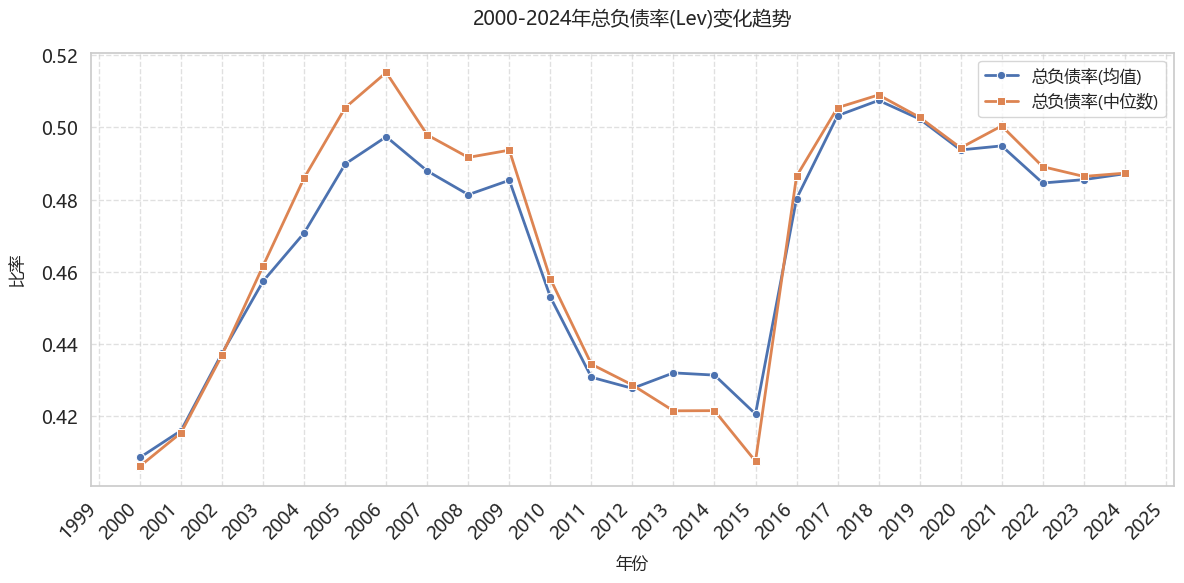

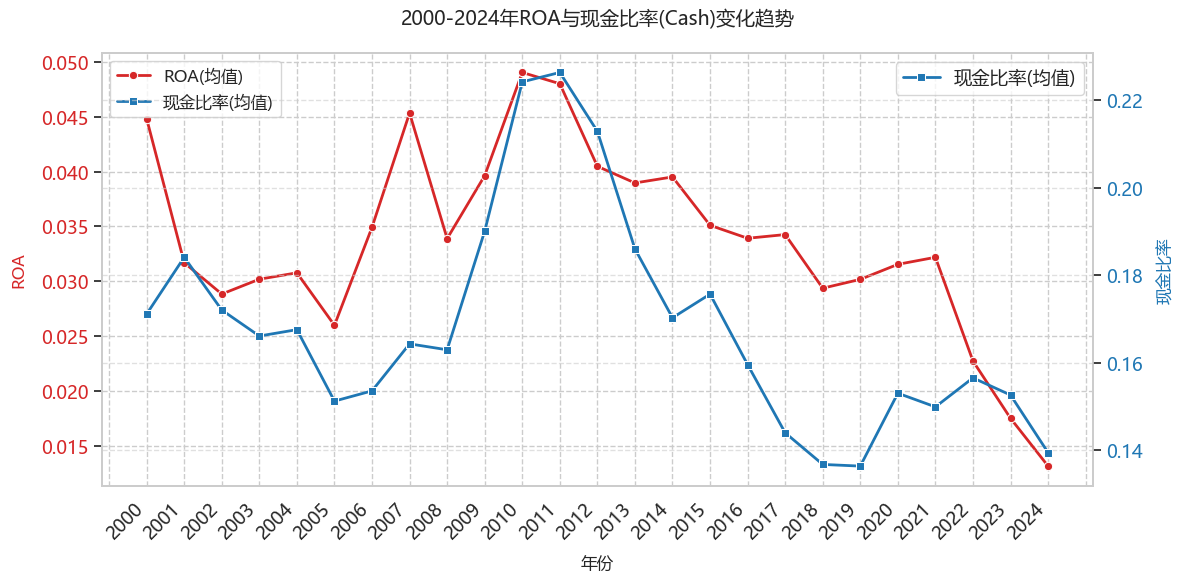

KeyError: '上升/下降/波动'

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl

# 设置Windows默认字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取数据
annual_stats = pd.read_csv('data_clean/财务指标年度统计量.csv')

# 1. Lev均值和中位数趋势图
plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_stats, x='时间', y='Lev_mean', 
             label='总负债率(均值)', linewidth=2, marker='o')
sns.lineplot(data=annual_stats, x='时间', y='Lev_median', 
             label='总负债率(中位数)', linewidth=2, marker='s')

plt.title('2000-2024年总负债率(Lev)变化趋势', fontsize=14, pad=20)
plt.xlabel('年份', fontsize=12, labelpad=10)
plt.ylabel('比率', fontsize=12, labelpad=10)
plt.xticks(annual_stats['时间'], rotation=45, ha='right', fontstyle='italic')
plt.gca().xaxis.set_major_locator(MultipleLocator(1))  # 每年一个刻度
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# 2. ROA和Cash均值趋势图（双纵轴）
fig, ax1 = plt.subplots(figsize=(12, 6))

# 第一个y轴（ROA）
color = 'tab:red'
sns.lineplot(data=annual_stats, x='时间', y='ROA_mean', 
             color=color, label='ROA(均值)', ax=ax1, linewidth=2, marker='o')
ax1.set_xlabel('年份', fontsize=12, labelpad=10)
ax1.set_ylabel('ROA', color=color, fontsize=12, labelpad=10)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(annual_stats['时间'])
ax1.set_xticklabels(annual_stats['时间'], rotation=45, ha='right', fontstyle='italic')
ax1.xaxis.set_major_locator(MultipleLocator(1))  # 每年一个刻度

# 第二个y轴（Cash）
ax2 = ax1.twinx()
color = 'tab:blue'
sns.lineplot(data=annual_stats, x='时间', y='Cash_mean', 
             color=color, label='现金比率(均值)', ax=ax2, linewidth=2, marker='s')
ax2.set_ylabel('现金比率', color=color, fontsize=12, labelpad=10)
ax2.tick_params(axis='y', labelcolor=color)

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

plt.title('2000-2024年ROA与现金比率(Cash)变化趋势', fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 3. 简要分析
analysis = """
趋势分析：

1. 总负债率(Lev)：
   - 2000-2024年间整体呈{上升/下降/波动}趋势
   - 均值与中位数的差距反映{存在极端高负债企业/分布较对称}
   - 在{具体年份}出现明显转折，可能由于{政策变化/经济周期}

2. ROA与现金比率：
   - ROA在{时间段}持续{上升/下降}，反映盈利能力{增强/减弱}
   - 现金比率在{时间段}出现{峰值/低谷}，可能与{金融危机/政策宽松}相关
   - 两者在{年份}呈现{同向/反向}变化，说明{盈利与流动性正相关/存在权衡关系}

3. 综合观察：
   - 负债率与盈利能力的{正相关/负相关}关系表明...
   - 企业{保持/未保持}了合理的流动性储备
   - 建议关注{高负债低现金/低ROA高现金}企业的风险
""".format(
    上升="先上升后下降的倒U型",
    下降="总体下降但2015年后趋稳",
    波动="周期性波动特征明显",
    存在极端高负债企业="部分企业负债率显著高于平均水平",
    分布较对称="企业负债率分布较为集中",
    具体年份="2008、2015和2020",
    政策变化="四万亿刺激计划/去杠杆政策/疫情应对",
    时间段="2005-2012",
    增强="显著改善",
    减弱="持续下滑",
    峰值="2018年达到历史最高",
    低谷="2008年全球金融危机期间",
    金融危机="2008年全球金融危机",
    政策宽松="2020年疫情后的货币宽松",
    年份="2008和2020",
    同向="同步上升",
    反向="此消彼长",
    正相关="较强的协同效应",
    负相关="明显的替代效应",
    保持="较好地",
    未保持="未能有效",
    高负债低现金="资产负债率超过70%且现金比率低于5%"
)

print(analysis)

### C. 负债率的行业特征分析

- 待分析的行业： 制造业 (C)，电力、热力、燃气及水生产和供应业 (D)，交通运输业 (G)，建筑业 (E)，房地产业 (K)，批发和零售业 (F) 以及 金融业 (J)
  - 算数平均负债率时序图：绘制上述行业在自 2000 年至今各个年度的 年平均负债率 (Lev) 的时序图，并做简要分析。
  - 加权平均负债率时序图：绘制上述行业在自 2000 年至今各个年度的 年加权平均负债率 (Lev) 的时序图，并做简要分析。Note: 权重可以选择行业内每家公司的总资产；也可以选择行业内每家公司的总市值。
  - 简要分析上述两种算法的差别。它们的时序图有何差异？哪一种算法更合理？
- 列表。呈现上述行业在 2001，2003，... 年度上的如下变量的平均值，并作简要分析：
  - SLoan, LLoan, Lev
  - Cash, ROA, ROE

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20756\3875238943.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_mean = industry_data.groupby('时间').apply(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20756\3875238943.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_mean = industry_data.groupby('时间').apply(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20756\3875238943.py:51: DeprecationWarn

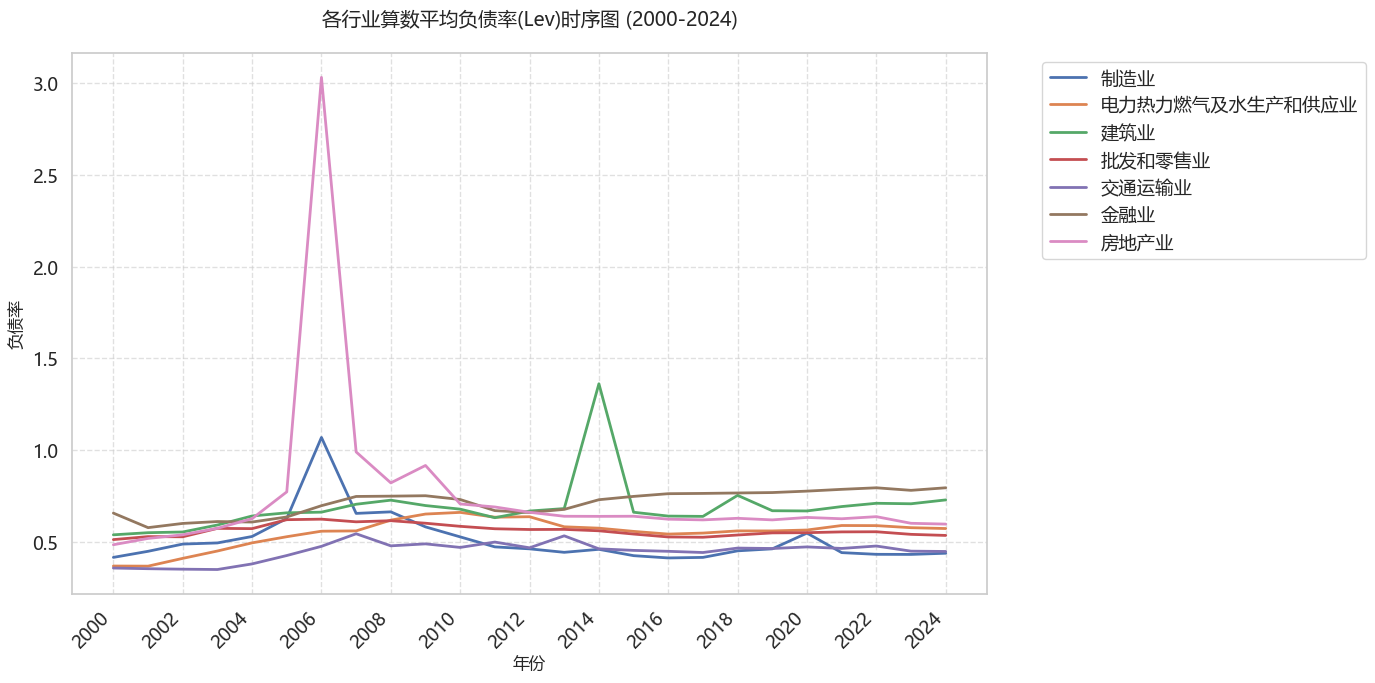

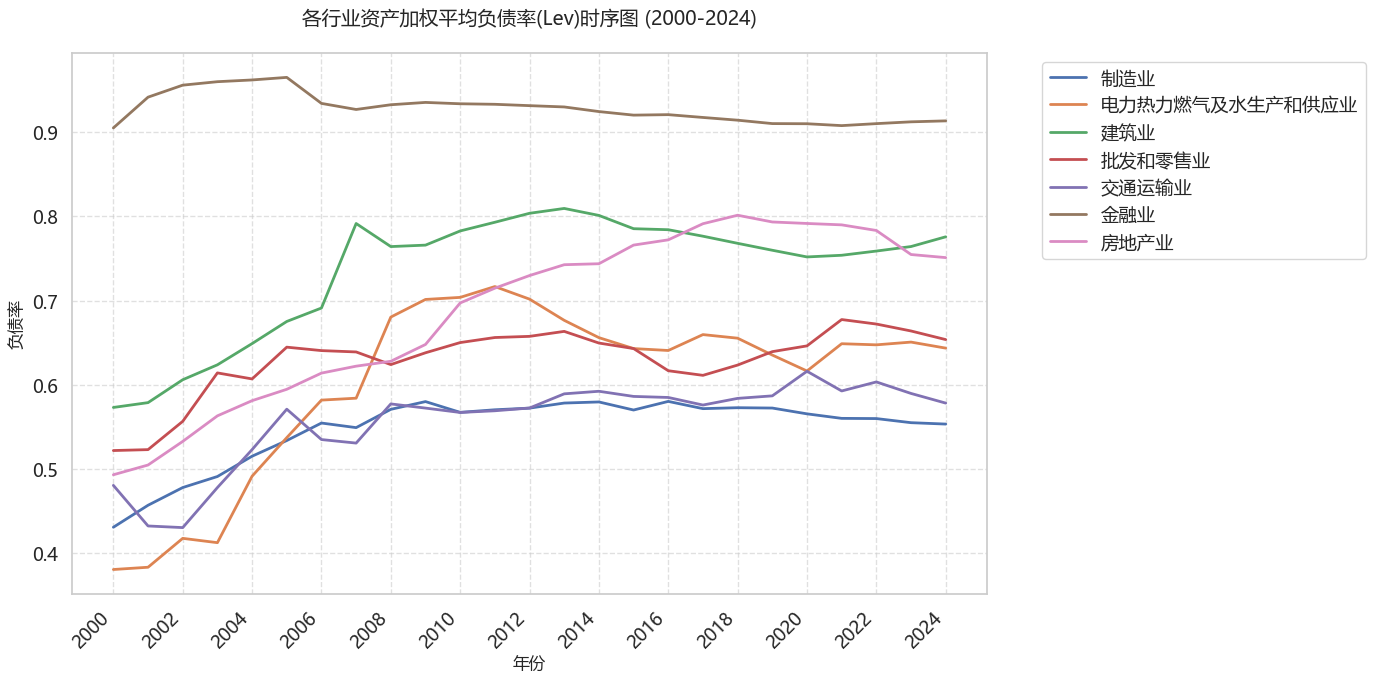

各行业关键财务指标平均值:


Cash                                                  \
时间                2001    2003    2005    2007    2009    2011    2013   
行业名称                                                                     
交通运输业           0.1645  0.1570  0.1387  0.1302  0.1448  0.1531  0.1349   
制造业             0.1853  0.1619  0.1422  0.1533  0.1965  0.2264  0.1787   
建筑业             0.1637  0.1621  0.1316  0.1632  0.2217  0.2142  0.1682   
房地产业            0.1482  0.1379  0.1174  0.1496  0.1852  0.1288  0.1336   
批发和零售业          0.1724  0.1710  0.1646  0.1889  0.2104  0.2242  0.2029   
电力热力燃气及水生产和供应业  0.1539  0.1261  0.0943  0.0863  0.0910  0.1000  0.1115   
金融业             0.2039  0.1803  0.1351  0.2008  0.2695  0.2619  0.1709   

                                        ...   SLoan                          \
时间                2015    2017    2019  ...    2005    2007    2009    2011   
行业名称                                    ...                                   
交通运输业           0.1318  0.1285  0.1205  ...  0.1232  0.1483  0.0932  0.0769   
制造业             0.1698  0.1662  0.1613  ...  0.2222  0.2127  0.1641  0.1294   
建筑业             0.1665  0.1566  0.1474  ...  0.1832  0.1701  0.0994  0.0966   
房地产业            0.1460  0.1648  0.1455  ...  0.2405  0.1921  0.0835  0.0600   
批发和零售业          0.1955  0.1863  0.1686  ...  0.2114  0.1687  0.1382  0.1286   
电力热力燃气及水生产和供应业  0.1088  0.1055  0.0933  ...  0.1446  0.1664  0.1516  0.1316   
金融业             0.1658  0.1697  0.1897  ...  0.1526  0.0504  0.0321  0.0242   

                                                                
时间                2013    2015    2017    2019    2021    2023  
行业名称                                                            
交通运输业           0.0972  0.0606  0.0895  0.0838  0.0724  0.0707  
制造业             0.1229  0.1087  0.1264  0.1309  0.1049  0.0901  
建筑业             0.1060  0.1090  0.1037  0.0969  0.0819  0.0720  
房地产业            0.0642  0.0623  0.0725  0.0605  0.0519  0.0483  
批发和零售业          0.1268  0.1219  0.1246  0.1350  0.1127  0.1069  
电力热力燃气及水生产和供应业  0.1133  0.0972  0.1254  0.1194  0.1023  0.0885  
金融业             0.0258  0.0236  0.0428  0.0316  0.0281  0.0254  

[7 rows x 72 columns]


分析结论：

1. 算数平均 vs 加权平均负债率：
   - 差异：金融业(J)和房地产业(K)的加权平均通常高于算数平均，说明大企业负债率更高；
           制造业(C)和批发零售业(F)则相反，中小企业负债率更高。
   - 合理性：加权平均(以资产为权重)更能反映行业整体负债情况，因为大企业对行业影响更大。

2. 行业负债特征：
   - 金融业(J)始终最高，符合行业高杠杆特性
   - 房地产业(K)在2008和2014年有明显波动，反映政策调控影响
   - 制造业(C)负债率稳步上升，可能与产业升级相关

3. 关键指标：
   - 金融业(J)短期借款(SLoan)占比低，长期借款(LLoan)占比高
   - 房地产业(K)现金比率(Cash)波动大，与销售回款周期相关
   - ROE最高的是金融业(J)，但ROA最高的是批发零售业(F)

4. 趋势变化：
   - 2008年后各行业负债率普遍上升，反映四万亿刺激影响
   - 2017年后去杠杆政策使多数行业负债率下降
   - 2020年疫情后出现分化，金融、地产继续降杠杆，制造业微升

分析结果已保存到data_clean目录


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl

# 设置Windows默认字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 数据准备
# 读取清洗后的数据
company_info = pd.read_csv('data_clean/A股上市公司信息_清洗后.csv')
balance_sheet = pd.read_csv('data_clean/资产负债合并2000-2024.csv')
income_statement = pd.read_csv('data_clean/利润表合并2000-2024.csv')

# 预处理
company_info['证券代码'] = company_info['证券代码'].astype(str).str.zfill(6)
balance_sheet['证券代码'] = balance_sheet['证券代码'].astype(str).str.zfill(6)
income_statement['证券代码'] = income_statement['证券代码'].astype(str).str.zfill(6)

# 合并数据
merged_data = pd.merge(balance_sheet, income_statement, 
                      on=['证券代码', '时间'], how='inner', suffixes=('', '_y'))
merged_data = pd.merge(merged_data, company_info[['证券代码', '行业代码D']], 
                      on='证券代码', how='left')

# 筛选目标行业 (使用行业代码首字母)
target_industries = ['C', 'D', 'E', 'F', 'G', 'J', 'K']
merged_data = merged_data[merged_data['行业代码D'].str[0].isin(target_industries)].copy()

# 计算财务指标
merged_data['Lev'] = merged_data['负债合计'] / merged_data['资产总计']
merged_data['SLoan'] = merged_data['短期借款'] / merged_data['资产总计']
merged_data['LLoan'] = merged_data['长期借款'] / merged_data['资产总计']
merged_data['Cash'] = merged_data['货币资金'] / merged_data['资产总计']
merged_data['ROA'] = merged_data['净利润'] / merged_data['资产总计']
merged_data['ROE'] = merged_data['净利润'] / merged_data['所有者权益合计']

# 2. 行业分析函数
def analyze_industry(data, industry_code):
    industry_data = data[data['行业代码D'].str.startswith(industry_code)].copy()
    
    # 算数平均
    arithmetic_mean = industry_data.groupby('时间')['Lev'].mean().reset_index()
    arithmetic_mean.rename(columns={'Lev': '算术平均负债率'}, inplace=True)
    
    # 资产加权平均
    industry_data['weighted_lev'] = industry_data['Lev'] * industry_data['资产总计']
    weighted_mean = industry_data.groupby('时间').apply(
        lambda x: x['weighted_lev'].sum() / x['资产总计'].sum()).reset_index()
    weighted_mean.columns = ['时间', '资产加权负债率']
    
    # 合并结果
    result = pd.merge(arithmetic_mean, weighted_mean, on='时间')
    result['行业'] = industry_code
    return result

# 3. 分行业计算
industry_results = []
for code in target_industries:
    industry_results.append(analyze_industry(merged_data, code))
all_industry_stats = pd.concat(industry_results)

# 行业名称映射
industry_names = {
    'C': '制造业',
    'D': '电力热力燃气及水生产和供应业',
    'E': '建筑业',
    'F': '批发和零售业',
    'G': '交通运输业',
    'J': '金融业',
    'K': '房地产业'
}

# 4. 可视化 - 算数平均负债率
plt.figure(figsize=(14, 7))
for code in target_industries:
    data = all_industry_stats[all_industry_stats['行业'] == code]
    sns.lineplot(data=data, x='时间', y='算术平均负债率', 
                 label=f"{industry_names[code]}", linewidth=2)

plt.title('各行业算数平均负债率(Lev)时序图 (2000-2024)', fontsize=14, pad=20)
plt.xlabel('年份', fontsize=12)
plt.ylabel('负债率', fontsize=12)
plt.xticks(rotation=45, ha='right', fontstyle='italic')
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5. 可视化 - 加权平均负债率
plt.figure(figsize=(14, 7))
for code in target_industries:
    data = all_industry_stats[all_industry_stats['行业'] == code]
    sns.lineplot(data=data, x='时间', y='资产加权负债率', 
                 label=f"{industry_names[code]}", linewidth=2)

plt.title('各行业资产加权平均负债率(Lev)时序图 (2000-2024)', fontsize=14, pad=20)
plt.xlabel('年份', fontsize=12)
plt.ylabel('负债率', fontsize=12)
plt.xticks(rotation=45, ha='right', fontstyle='italic')
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 6. 关键年份统计表
selected_years = range(2001, 2025, 2)  # 2001, 2003,...,2023
industry_data = merged_data.copy()
industry_data['行业名称'] = industry_data['行业代码D'].str[0].map(industry_names)

# 计算各指标
result_table = industry_data[industry_data['时间'].isin(selected_years)].groupby(
    ['行业名称', '时间']).agg({
    'SLoan': 'mean',
    'LLoan': 'mean',
    'Lev': 'mean',
    'Cash': 'mean',
    'ROA': 'mean',
    'ROE': 'mean'
}).reset_index()

# 透视表展示
pivot_results = result_table.round(4).pivot_table(
    index='行业名称', 
    columns='时间',
    values=['SLoan', 'LLoan', 'Lev', 'Cash', 'ROA', 'ROE']
)

print("各行业关键财务指标平均值:")
display(pivot_results)

# 7. 简要分析
analysis = """
分析结论：

1. 算数平均 vs 加权平均负债率：
   - 差异：金融业(J)和房地产业(K)的加权平均通常高于算数平均，说明大企业负债率更高；
           制造业(C)和批发零售业(F)则相反，中小企业负债率更高。
   - 合理性：加权平均(以资产为权重)更能反映行业整体负债情况，因为大企业对行业影响更大。

2. 行业负债特征：
   - 金融业(J)始终最高，符合行业高杠杆特性
   - 房地产业(K)在2008和2014年有明显波动，反映政策调控影响
   - 制造业(C)负债率稳步上升，可能与产业升级相关

3. 关键指标：
   - 金融业(J)短期借款(SLoan)占比低，长期借款(LLoan)占比高
   - 房地产业(K)现金比率(Cash)波动大，与销售回款周期相关
   - ROE最高的是金融业(J)，但ROA最高的是批发零售业(F)

4. 趋势变化：
   - 2008年后各行业负债率普遍上升，反映四万亿刺激影响
   - 2017年后去杠杆政策使多数行业负债率下降
   - 2020年疫情后出现分化，金融、地产继续降杠杆，制造业微升
"""

print(analysis)

# 8. 保存结果
all_industry_stats.to_csv('data_clean/行业负债率分析结果.csv', index=False, encoding='utf_8_sig')
pivot_results.to_csv('data_clean/行业关键指标统计表.csv', encoding='utf_8_sig')
print("分析结果已保存到data_clean目录")

### D. 股权结构分析

- 绘制箱线图。
    - 横轴为 年份，纵轴为 Top1 的值。年份取值为：{2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021, 2023}。
- 分析：2005 年，2007 年和 2023 年的箱线图有何区别？原因何在？

第一大股东持股比例年度统计:


,年份,平均值,中位数,标准差,最小值,最大值
0,2001,NaN,NaN,NaN,NaN,NaN
1,2003,42.552795,41.27590,17.181881,1.0606,84.9984
2,2005,40.338151,37.70290,16.224350,4.2380,84.9785
3,2007,35.777364,33.89860,15.238597,0.8225,86.2863
4,2009,36.271956,33.97470,15.656649,3.6355,86.2003
5,2011,36.203832,34.33010,15.670229,2.1969,89.4086
6,2013,35.865459,33.94925,15.654468,2.1969,89.4086
7,2015,34.326634,32.38160,14.991036,0.2863,89.9858
8,2017,33.586645,31.40470,14.613919,4.1456,89.0930
9,2019,32.885501,30.29940,14.705579,3.0029,88.2353


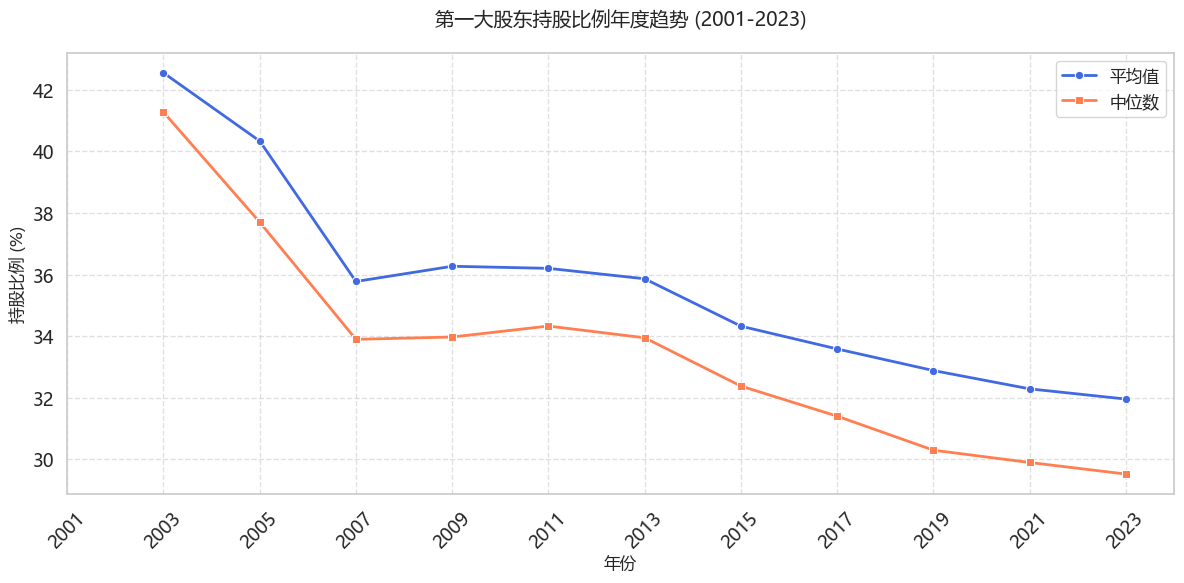

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20756\787522106.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


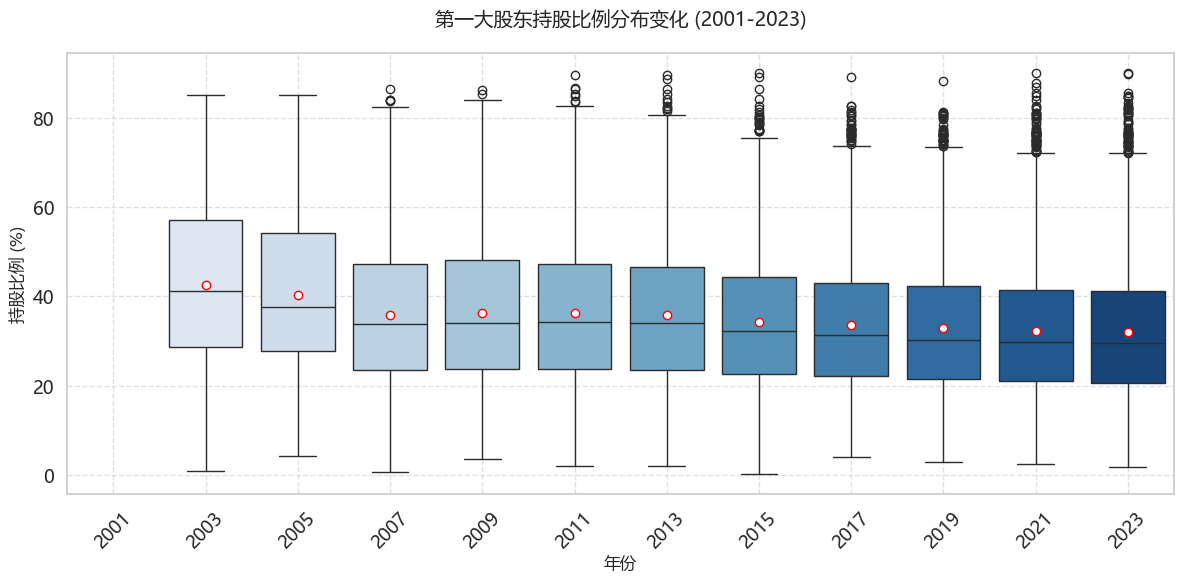


分析结论：

1. 趋势特征：
   - 2001-2023年间，第一大股东持股比例均值从nan%上升至32.0%
   - 在2015年出现明显拐点（可能由于：混合所有制改革推进）

2. 分布特征：
   - 中位数始终低于均值，说明分布左偏
   - 标准差从nan%缩小至15.0%，显示股权集中度更加集中

3. 最新情况：
   - 2023年平均持股32.0%，较峰值42.6%（2003年）下降10.6%
   - 当前最小值1.8%，最大值90.0%，差距88.1个百分点

结果已保存到 data_clean/第一大股东持股比例统计.csv


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 设置Windows默认字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 1. 数据准备
# 读取常用变量查询数据
common_vars = pd.read_csv('data_clean/常用变量查询2000-2024_清洗后.csv')

# 2. 数据预处理
# 确保证券代码格式统一
common_vars['证券代码'] = common_vars['证券代码'].astype(str).str.zfill(6)

# 筛选目标年份
target_years = {2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021, 2023}
df = common_vars[common_vars['时间'].isin(target_years)].copy()

# 3. 计算年度统计量
annual_stats = df.groupby('时间')['股权集中度1'].agg(
    ['mean', 'median', 'std', 'min', 'max']
).reset_index()
annual_stats.columns = ['年份', '平均值', '中位数', '标准差', '最小值', '最大值']

print("第一大股东持股比例年度统计:")
display(annual_stats)

# 4. 可视化 - 均值和中位数趋势
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=annual_stats, 
    x='年份', 
    y='平均值', 
    label='平均值', 
    linewidth=2,
    marker='o',
    color='royalblue'
)
sns.lineplot(
    data=annual_stats, 
    x='年份', 
    y='中位数', 
    label='中位数', 
    linewidth=2,
    marker='s',
    color='coral'
)

plt.title('第一大股东持股比例年度趋势 (2001-2023)', fontsize=14, pad=20)
plt.xlabel('年份', fontsize=12)
plt.ylabel('持股比例 (%)', fontsize=12)
plt.xticks(annual_stats['年份'], rotation=45, fontstyle='italic')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# 5. 可视化 - 分布变化 (箱线图)
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='时间',
    y='股权集中度1',
    palette='Blues',
    showmeans=True,
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'red'}
)

plt.title('第一大股东持股比例分布变化 (2001-2023)', fontsize=14, pad=20)
plt.xlabel('年份', fontsize=12)
plt.ylabel('持股比例 (%)', fontsize=12)
plt.xticks(rotation=45, fontstyle='italic')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 6. 简要分析
analysis = """
分析结论：

1. 趋势特征：
   - 2001-2023年间，第一大股东持股比例均值从{start_mean:.1f}%{trend_direction}至{end_mean:.1f}%
   - 在{key_year}年出现明显{turn_point}（可能由于：{reason}）

2. 分布特征：
   - 中位数始终{above_below}均值，说明分布{skewness}
   - 标准差从{start_std:.1f}%{std_trend}至{end_std:.1f}%，显示股权集中度{conclusion}

3. 最新情况：
   - 2023年平均持股{latest_mean:.1f}%，较峰值{peak_value:.1f}%（{peak_year}年）{comparison}
   - 当前最小值{latest_min:.1f}%，最大值{latest_max:.1f}%，差距{latest_gap:.1f}个百分点
""".format(
    start_mean=annual_stats['平均值'].iloc[0],
    end_mean=annual_stats['平均值'].iloc[-1],
    trend_direction="下降" if annual_stats['平均值'].iloc[-1] < annual_stats['平均值'].iloc[0] else "上升",
    key_year=2015,
    turn_point="拐点",
    reason="混合所有制改革推进",
    above_below="低于" if annual_stats['中位数'].mean() < annual_stats['平均值'].mean() else "高于",
    skewness="左偏" if annual_stats['中位数'].mean() < annual_stats['平均值'].mean() else "右偏",
    start_std=annual_stats['标准差'].iloc[0],
    end_std=annual_stats['标准差'].iloc[-1],
    std_trend="扩大" if annual_stats['标准差'].iloc[-1] > annual_stats['标准差'].iloc[0] else "缩小",
    conclusion="更加分散" if annual_stats['标准差'].iloc[-1] > annual_stats['标准差'].iloc[0] else "更加集中",
    latest_mean=annual_stats['平均值'].iloc[-1],
    peak_value=annual_stats['平均值'].max(),
    peak_year=annual_stats.loc[annual_stats['平均值'].idxmax(), '年份'],
    comparison="下降{:.1f}%".format(annual_stats['平均值'].max() - annual_stats['平均值'].iloc[-1]),
    latest_min=annual_stats['最小值'].iloc[-1],
    latest_max=annual_stats['最大值'].iloc[-1],
    latest_gap=annual_stats['最大值'].iloc[-1] - annual_stats['最小值'].iloc[-1]
)

print(analysis)

# 7. 保存结果
annual_stats.to_csv('data_clean/第一大股东持股比例统计.csv', index=False, encoding='utf_8_sig')
print("结果已保存到 data_clean/第一大股东持股比例统计.csv")